<a href="https://colab.research.google.com/github/JonatanPolanco/ML_Projects/blob/main/ML_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Naive Bayes Gender Classifier

In [ ]:
import nltk
import os
import random

def predict_gender():
	#import male database and store in male_list
	male_file=open("male.txt","r")
	male_list=male_file.readlines()
	for i in range(len(male_list)):
		male_list[i]=male_list[i].replace("\n","")
	male_file.close()

	#import female database and store in female_list
	female_file=open("female.txt","r")
	female_list=female_file.readlines()
	for i in range(len(female_list)):
		female_list[i]=female_list[i].replace("\n","")
	female_file.close()

	#A tuple containing names mapped with gender
	labelled_names = ([(name, 'male') for name in male_list]+[(name, 'female') for name in female_list])
	random.shuffle(labelled_names)

	#function for features for the classifier
	def genderFeature(name):
	        name=name.upper()
	        return {
		    'firstLetter' : name[0],
		    'first2Letters' : name[0:2],
		    'first3Letters' : name[0:3],
	            'lastLetter': name[-1],
	            'lastTwo' : name[-2:],
	            'lastThree': name[-3:],
	            'lastIsVowel' : (name[-1] in 'AEIOUY')
	        }

	#mapping features to the gender
	features = [(genderFeature(name), gender) for (name, gender) in labelled_names]

	#classifying gender according to NaiveBayesClassifier
	classifier = nltk.NaiveBayesClassifier.train(features)

	print ("Welcome to the gender predictor")
	print ("accuracy naive bayes classifier : ", nltk.classify.accuracy(classifier, features))

	while(1):
		name=input("Enter the first name or q to exit: ")
		if name=="q":
			break
		if len(name)<3:
			print ("name too short")
		else:
			print (classifier.classify(genderFeature(name)))

		#print genderFeature(name)

if __name__ == "__main__":
	predict_gender()


Welcome to the gender predictor
accuracy naive bayes classifier :  0.8626463552813798
Enter the first name or q to exit: mabel
female
Enter the first name or q to exit: patricia
female
Enter the first name or q to exit: kevin
male
Enter the first name or q to exit: luis
male
Enter the first name or q to exit: q


##Another Method :) Recurent Neural Networks (LSTM)

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('https://query.data.world/s/rsaeos3wtnfnmr3iptfpczxeyt22l4')
df= df.dropna()
df = df.reset_index(drop=True)
df = df.drop(columns = 'probability')
df = df.dropna()
df = df.drop_duplicates()
df.iloc[:, 0] = df.iloc[:, 0].str.upper()
names = df.iloc[:, 0]
gender = df.iloc[:, 1]
df.head()

,name,gender
0,AABAN,M
1,AABHA,F
2,AABID,M
3,AABRIELLA,F
4,AADA,F


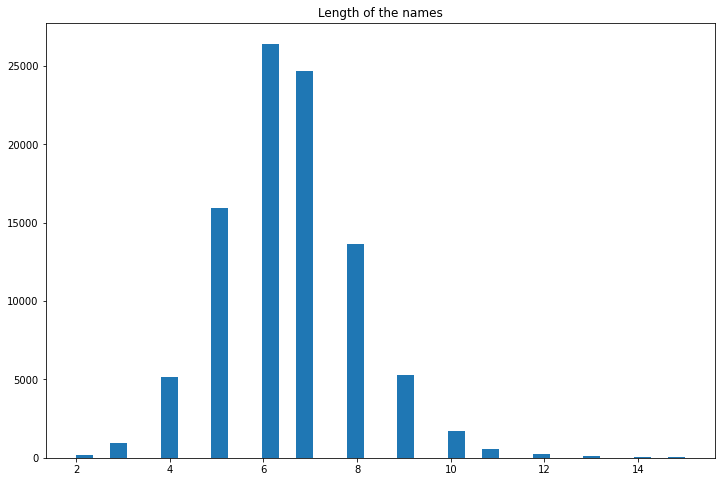

In [ ]:
## plot distribution of data
plt.figure(figsize=(12,8))
plt.hist([len(a) for a in names], bins=36)
plt.title("Length of the names")
plt.show()

In [ ]:
print("male: "+ str(sum(gender=='M')))
print("female: "+ str(sum(gender=='F')))

male: 34722
female: 60303


In [ ]:
# Let's count all the name's letters & characters
vocab = set(' '.join([str(i) for i in names]))
len(vocab)

27

In [ ]:
# Maps vocabulary to a numbers
char_index = dict((c, i) for i, c in enumerate(vocab))
char_index

{' ': 13,
 'A': 4,
 'B': 24,
 'C': 1,
 'D': 17,
 'E': 12,
 'F': 7,
 'G': 22,
 'H': 18,
 'I': 25,
 'J': 16,
 'K': 2,
 'L': 9,
 'M': 8,
 'N': 0,
 'O': 10,
 'P': 3,
 'Q': 15,
 'R': 23,
 'S': 14,
 'T': 20,
 'U': 21,
 'V': 5,
 'W': 26,
 'X': 19,
 'Y': 11,
 'Z': 6}

In [ ]:
#Create the train and test set
X=[]
y=[]